In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

import os
import json


Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


# IDEA:
## People younger than 30-years-old are more likely than others to choose biking _for commuting_

# NULL HYPOTHESIS:
## The proportion of people younger than 30-years-old biking on weekdays is _the same_ or _higher_  than the proportion of people older than 30-years-old biking on weekdays

# _$H_0$_ : ${Y_{\mathrm{weekdays}}} <= {O_{\mathrm{weekdays}}}$
# _$H_1$_ : ${Y_{\mathrm{weekdays}}} > {O_{\mathrm{weekdays}}}$

or identically:

# _$H_0$_ : ${Y_{\mathrm{weekdays}}} - {O_{\mathrm{weekdays}}} <= 0 $
# _$H_1$_ : ${Y_{\mathrm{weekdays}}} - {O_{\mathrm{weekdays}}} > 0$
## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            #os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
raw_data = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
raw_data['date'] = pd.to_datetime(raw_data['starttime'])
raw_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [5]:
raw_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
raw_data.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [7]:
raw_data.head()

,birth year,date
0,1958.0,2016-01-01 00:00:41
1,1969.0,2016-01-01 00:00:45
2,1982.0,2016-01-01 00:00:48
3,1961.0,2016-01-01 00:01:06
4,1952.0,2016-01-01 00:01:12


In [8]:
raw_data['weekday'] = raw_data['date'].dt.weekday + 1
raw_data.dropna(axis='index',how='any',inplace=True)
raw_data.head()

,birth year,date,weekday
0,1958.0,2016-01-01 00:00:41,5
1,1969.0,2016-01-01 00:00:45,5
2,1982.0,2016-01-01 00:00:48,5
3,1961.0,2016-01-01 00:01:06,5
4,1952.0,2016-01-01 00:01:12,5


In [9]:
weekend = raw_data[(raw_data['weekday']==6)|(raw_data['weekday']==7)]
drop_index = weekend.index.values.tolist()
weekday = raw_data.drop(drop_index)
young = weekday[(weekday['birth year'] <= 1986)]
old = weekday[(weekday['birth year'] > 1986)]

In [10]:

yday_1 = len((young[(young['weekday']==1)]))
yday_2 = len((young[(young['weekday']==2)]))
yday_3 = len((young[(young['weekday']==3)]))
yday_4 = len((young[(young['weekday']==4)]))
yday_5 = len((young[(young['weekday']==5)]))
young_count = [yday_1,yday_2,yday_3,yday_4,yday_5]
oday_1 = len((old[(old['weekday']==1)]))
oday_2 = len((old[(old['weekday']==2)]))
oday_3 = len((old[(old['weekday']==3)]))
oday_4 = len((old[(old['weekday']==4)]))
oday_5 = len((old[(old['weekday']==5)]))
old_count = [oday_1,oday_2,oday_3,oday_4,oday_5]
print(young_count,old_count)
type(young_count)

[42836, 47653, 60009, 68879, 79858] [10733, 11669, 14109, 16310, 19870]


list

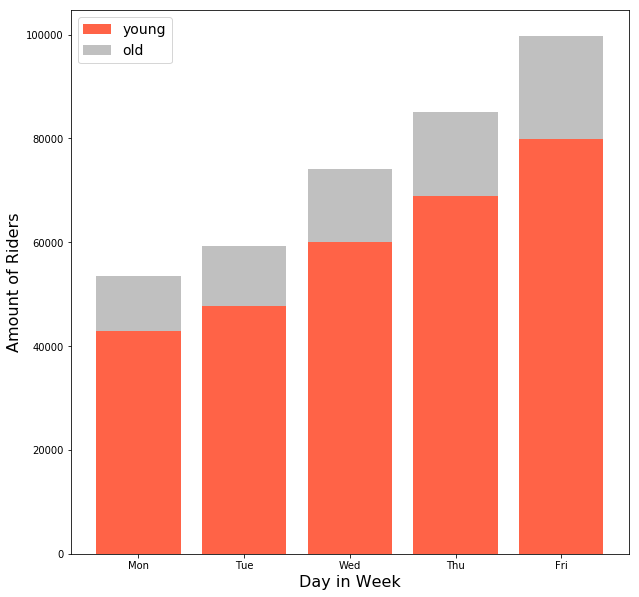

In [17]:
import matplotlib.pyplot as plt 
name_list = ['Mon','Tue','Wed','Thu','Fri']
plt.figure(figsize=(10,10))
plt.bar(range(len(name_list)), young_count, label='young',fc = 'tomato')
plt.bar(range(len(name_list)), old_count, bottom=young_count, label='old',tick_label = name_list,fc = 'silver')
plt.xlabel('Day in Week',fontsize=16)
plt.ylabel('Amount of Riders',fontsize=16)
plt.legend(fontsize=14)

### Figure 1: Distribution of Citibike bikers by age in January 2016, absolute counts